In [3]:
using PyPlot

INFO: Loading help data...


We use the gradient descent function from the class google drive folder:

First, set up variables that are given or that we found by hand. Then use line search algorithms to find the minimum. Our implementations are adapted from the iPython notebooks on the Google Drive.

In [12]:
T = [0.9, 1.5, 13.8, 19.8, 24.1, 28.2, 35.2, 60.3, 74.6, 81.3]
C = [455.2, 424.6, 122.1, 68.3, 43.2, 26.1, 13.1, 1.4, 0.4, 0.3]

m(x, t) = x[1] * exp(x[2] * t) + x[3]
dm(x, t) = [exp(x[2] * t)
            x[1] * t * exp(x[2] * t)
            1]


r(x) = m(x,T) - C
dr(x) = [exp(x[2]*T) x[1].*T.*exp(x[2]*T) ones(length(T))]'

f(x) = 0.5 * norm(m(x, T) - C)^2 
df(x) = dr(x)*r(x)
d2f(x) = (dr(x)*dr(x)')

x0 = [100, -1, 0]

3-element Array{Int64,1}:
 100
  -1
   0

# Gradient descent

We could not get gradient descent to work. It seems to converge at the wrong answer close to x_0 no matter what parameters we tweak.

i=   0, f=177987.64 |df|=2.9e+04 
i= 100, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 200, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 300, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 400, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 500, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 600, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 700, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 800, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i= 900, f=135314.06 |df|=1.0e+05, t=0.0e+00 
i=1000, f=135314.06 |df|=1.0e+05, t=0.0e+00 
[100.00774909310908,-0.14100456470881506,0.032751897485781827]

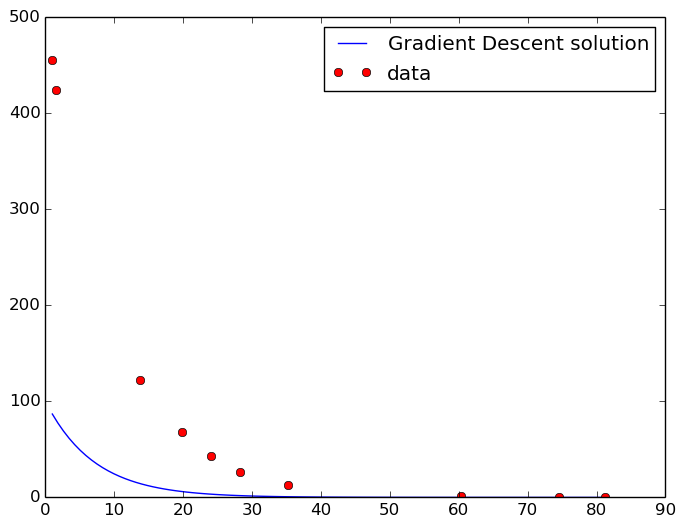

In [7]:
include("/home/juser/math346/optiFuncs.jl")

T = [0.9, 1.5, 13.8, 19.8, 24.1, 28.2, 35.2, 60.3, 74.6, 81.3]
C = [455.2, 424.6, 122.1, 68.3, 43.2, 26.1, 13.1, 1.4, 0.4, 0.3]

m(x, t) = x[1] * exp(x[2] * t) + x[3]
dm(x, t) = [exp(x[2] * t)
            x[1] * t * exp(x[2] * t)
            1]


r(x) = m(x,T) - C
dr(x) = [exp(x[2]*T) x[1].*T.*exp(x[2]*T) ones(length(T))]'

f(x) = 0.5 * norm(m(x, T) - C)^2 
df(x) = dr(x)*r(x)

x0 = [100, -1, 0]
@printf "i=%4d, f=%1.2f |df|=%1.1e \n" 0 f(x0) norm(df(x0))
xgd = copy(x0)
stepMax = .002
for i=1:1000
    # pick descent direction
    dx = -df(xgd) 
    
    # find out how far to go
    tt = linspace(0,stepMax,201)
    ft = [f(xgd+tt[k]*dx) for k=1:length(tt)]
    id = indmin(ft)
    t0 = tt[id]
    # update model
    xgd = xgd+t0*dx
    if mod(i, 100)==0
        @printf "i=%4d, f=%1.2f |df|=%1.1e, t=%1.1e \n" i f(xgd) norm(df(xgd)) t0
    end
end
print(xgd)
t=linspace(1,81.3)
plot(t,m(xgd,t),hold=true)
plot(T,C,"or")
legend(("Gradient Descent solution","data"));

We get a similar but slightly different wrong answer if we use the gd function from optiFuncs.jl with armijo line search

In [8]:
myLS(f,fc,df,x,pk) =  armijo(f,fc,df,x,pk,alpha=1e-1,b=0.7,maxIter=2000)
gd(f, df, x0, maxIter=10000, ls=myLS)

([100.811,-0.0261396,0.798427],
10000x2 Array{Float64,2}:
 177988.0   28655.2 
 127313.0  152817.0 
 124282.0  722613.0 
 120954.0  114304.0 
 120704.0  165072.0 
 120461.0   75491.9 
 120273.0   45307.8 
 120232.0   17660.8 
 120228.0   14656.0 
 120223.0    4947.77
 120223.0    4218.89
 120222.0    3636.45
 120222.0    3123.2 
      ⋮             
 119203.0    1573.05
 119203.0    2201.57
 119203.0    1842.92
 119202.0    1577.16
 119202.0    2221.97
 119202.0    1866.08
 119202.0    1589.96
 119202.0    2231.03
 119202.0    1865.25
 119202.0    1593.97
 119202.0    2251.7 
 119202.0    1888.91,

3x10000 Array{Float64,2}:
 100.0  100.008      100.009       100.009      …  100.811      100.811    
  -1.0   -0.0780386   -0.00993349   -0.0364558      -0.0260961   -0.0263161
   0.0    0.0351527    0.0355461     0.0355613       0.798292     0.79836  )

We might expect this if there was a local minimum near x_0. But f is convex because this is a least squares problem, so it has no local minima. Also, trying with different x_0's gives  _different_ wrong answers.

In [11]:
x0_test = [400, 0, 0]
println(f(gd(f, df, x0_test, maxIter=10000, ls=myLS)[1]))

x0_test = [-500, -500, -500]
println(f(gd(f, df, x0_test, maxIter=10000, ls=myLS)[1]))

x0_test = [600, -0.5, -5]
println(f(gd(f, df, x0_test, maxIter=10000, ls=myLS)[1]))

6249.674570967164
138226.78049999996
5901.853341109092


So we are stumped.

#Gauss Newton method:

In [38]:
using Dates

start_time = now()
@printf "i=%d, f=%1.2f |df|=%1.1e \n" 0 f(x0) norm(df(x0))
x = copy(x0)
mu = 10;
lambda = 1e-4
numIterations = 20

his = zeros(numIterations)
for i=1:numIterations
    dx = -((d2f(x))\df(x))
    
    if norm(dx)>mu
        dx = -((d2f(x)+lambda*eye(length(x)))\df(x))
    end
    
    # find out how far to go
    tt =linspace(0,1,201)
    ft = [f(x+tt[k]*dx) for k=1:length(tt)]
    id = indmin(ft)
    t0 = tt[id]
    x = x+t0*dx
    fx = f(x)
    his[i] = fx - 8.13742451899386 # 8.13... = f(x*)
    @printf "i=%d, f=%1.2f |df|=%1.1e, t=%1.1e \n" i fx norm(df(x)) t0
end
println("x*   : ", x)
println("f(x*): ", f(x))
end_time = now()


println("Newton's method took ", end_time - start_time)

i=0, f=177987.64 |df|=2.9e+04 
i=1, f=128185.17 |df|=1.4e+05, t=8.0e-02 
i=2, f=10123.36 |df|=8.1e+04, t=1.0e+00 
i=3, f=2883.33 |df|=1.5e+04, t=3.7e-01 
i=4, f=15.97 |df|=1.1e+04, t=9.9e-01 
i=5, f=8.14 |df|=1.1e+02, t=1.0e+00 
i=6, f=8.14 |df|=5.9e-02, t=1.0e+00 
i=7, f=8.14 |df|=1.1e-04, t=1.0e+00 
i=8, f=8.14 |df|=9.2e-05, t=1.9e-01 
i=9, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=10, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=11, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=12, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=13, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=14, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=15, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=16, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=17, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=18, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=19, f=8.14 |df|=9.2e-05, t=0.0e+00 
i=20, f=8.14 |df|=9.2e-05, t=0.0e+00 
x*   : [496.95141655953563,-0.10155122505421076,-0.12442465612372755]
f(x*): 8.13742451899386
Newton's method took 0 milliseconds


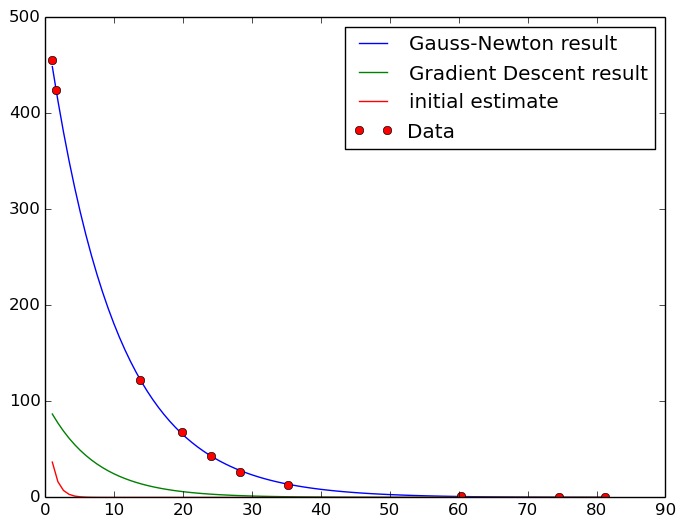

PyObject <matplotlib.legend.Legend object at 0x7ff4c7092b90>

In [18]:
plot(t,m(x,t),hold=true)
plot(t,m(xgd,t))
plot(t,m(x0,t))
plot(T,C,"or")
legend(("Gauss-Newton result","Gradient Descent result","initial estimate","Data"))

Because gradient descent is not working, we cannot compare its convergence rate to newton's. If we could, we would expect that gd would converge more slowly than newton's method.

Plot of f(x) - f(x\*) over the number of the iterate:

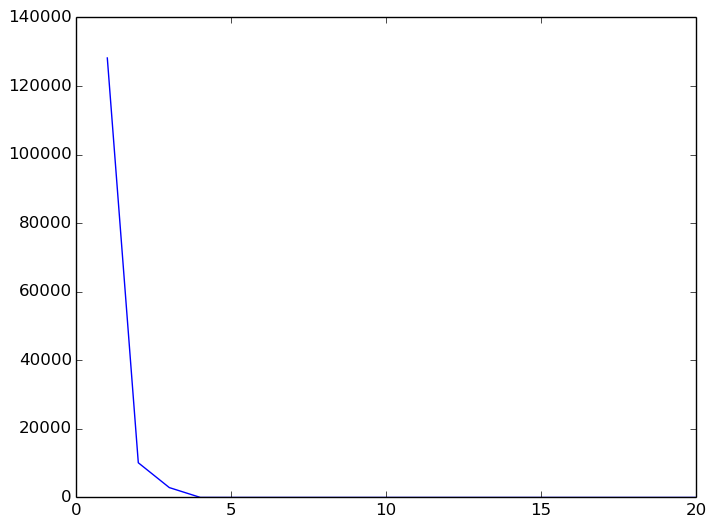

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f39c9cf6290>

In [39]:
plot(1:numIterations, his)